# INTERFACE  COM PYTHON

`Julia` permite utilizar os pacotes de Python e suas bibliotecas de forma prática através da chamada `PyCall`. A maneira mais fácil para trabalhar com `PyCall` é deixar o `Conda.jl` gerenciar os pacote do `Python` independentemente das versões instaladas em seu sistema:
```julia
ENV["PYTHON"]=""
Pkg.build("PyCall")

# isto será feito apenas uma vez, e será lembrado nas outras utilizações.

```
Caso queira usar sua própria versão do `Python` instalado no sistema (melhor opção caso use o anaconda ex: `/home/jmarcellopereira/anaconda2/bin/python2.7`), informe o PATH como descrito abaixo:
```julia
ENV["PYTHON"] = "diretorio no qual python está instalado"
Pkg.build("PyCall")
```
OBS: É importante somente este `notebook` funcionando para que o processo ocorra bem. Caso ocorra erro do tipo `     LOCKERROR: It looks like conda is already doing something.` Encerre os outros notebooks e execute o comando novamente.

In [1]:
ENV["PYTHON"]="/home/jmarcellopereira/anaconda2/bin/python2"
Pkg.build("PyCall")

INFO: Building PyCall
INFO: PyCall is using /home/jmarcellopereira/anaconda2/bin/python2 (Python 2.7.12) at /home/jmarcellopereira/anaconda2/bin/python2, libpython = /home/jmarcellopereira/anaconda2/lib/libpython2.7


## UTILIZANDO NUMPY E SYMPY

`NumPy` é um módulo de extensão de Python que fornece uma operação eficiente em matrizes de dados homogêneos. Ele permite que python trabalhe a manipulação de dados numéricos. `SciPy` é um conjunto de ferramentas científicas e numéricos para Python de código aberto (licença BSD). Atualmente ele suporta funções especiais, integração, calculo de equações diferenciais (ODE), otimização de gradiente, ferramentas de programação paralela, um compilador de expressão para C ++ para execução rápida, e outros.

In [5]:
using PyCall

### BIBLIOTECAS NUMPY

Sintaxe:
```julia
@pyimport numpy as nome_alias
```

**Interpolação linear unidimensional com NumPy**

In [6]:
@pyimport numpy as np

In [7]:
# dados
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];

In [8]:
# calcular valor para x = 5.5
np.interp(5.5, x, y)

8.65

In [9]:
xvals = np.linspace(0, 10, 50)
yinterp = np.interp(xvals, x, y);


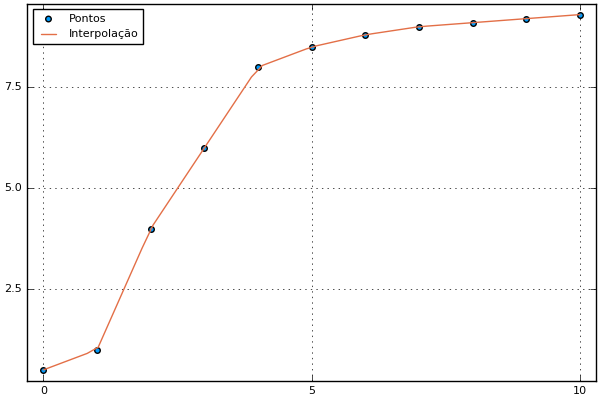

In [12]:
using Plots
pyplot()

scatter(x, y, label = "Pontos")
plot!(xvals, yinterp, label = "Interpolação")

### BIBLIOTECAS SCIPY

Sintaxe:
```julia
@pyimport scipy.biblioteca as nome_alias
```
Bibliotecas Importantes:

- Funções especiais (scipy.special): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/special.html   
- Integração (scipy.optimize) :https://docs.scipy.org/doc/scipy-0.14.0/reference/optimize.html#module-scipy.optimize
- Optiização (scipy.integrate)    
- Interpolação (scipy.interpolate): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/interpolate.html
- Transformada de Fourier (scipy.fftpack): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html
- Processamento de sinais (scipy.signal): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/signal.html
- Algebra Linear (scipy.linalg)(: https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/linalg.html
- Rotinas de Gráficos Dispersos Compactados(scipy.sparse.csgraph): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/csgraph.html)
- estruturas de dados espaciais e algoritmos (scipy.spatial): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/spatial.html
- Estatísticas (scipy.stats):https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/stats.html
- processamento de imagem multidimensional (scipy.ndimage): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/ndimage.html
- Arquivo Entrada e Saída (scipy.io): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/io.html
- Ondas (scipy.weave): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/weave.html

**Raízes de uma Função**

Encontrar uma raiz usando o Newton-Raphson e método secante. Sintaxe:
```python
optimize.newton(funcao, x_inicial, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None)

```
obs: fprime é a derivada da função, quando não passada o método da secante é utilizado

In [13]:
@pyimport scipy.optimize as sco

In [15]:
# cálculo da raiz utilizando o método de Newton
sco.newton(x -> x^2  -4 , 5)

2.0

**Integração Numérica**

Calcula a integral numérica de uma função. Sintaxe:
```python
integrate.quad(funcao, limite_inferior, limite_superior, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50))
```

In [16]:
@pyimport scipy.integrate as sci

In [17]:
sci.quad(x -> x^2 - 4, 0, 10)

(293.33333333333337,3.375663205707763e-12)

**Interpolação ScyPy**

In [18]:
@pyimport scipy.interpolate as scint

In [20]:
fsp = scint.interp1d(x, y, kind ="cubic")
fln = scint.interp1d(x, y, kind = "linear")
fqd = scint.interp1d(x, y, kind = "quadratic")
fsln = scint.interp1d(x, y, kind = "slinear")

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7fa68b5ca470>

In [21]:
# dados
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];


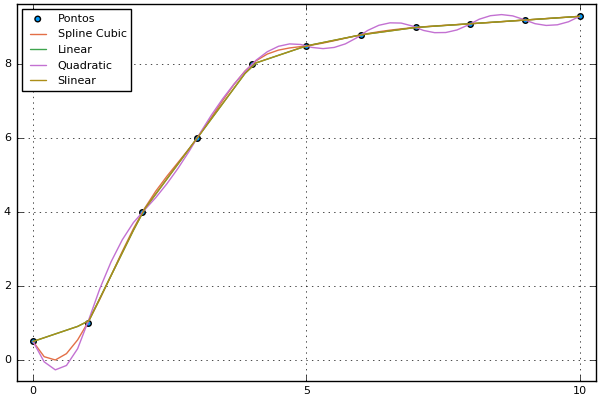

In [22]:
using Plots
pyplot()

scatter(x, y, label = "Pontos")
plot!(xvals, fsp(xvals), label = "Spline Cubic")
plot!(xvals, fln(xvals), label = "Linear")
plot!(xvals, fqd(xvals), label = "Quadratic")
plot!(xvals, fsln(xvals), label = "Slinear")